                                              LOGISTIC REGRESSION                                                           

1. Data Exploration:            

a. Load the dataset and perform exploratory data analysis (EDA).


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Number of outliers in each column:\n", outliers.sum())

Number of outliers in each column:
 Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [ ]:
for col in df.columns[:-1]:  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [9]:
print(df.duplicated().sum())

0


In [10]:
print(df.nunique())

Pregnancies                  15
Glucose                     136
BloodPressure                42
SkinThickness                51
Insulin                     157
BMI                         242
DiabetesPedigreeFunction    490
Age                          47
Outcome                       2
dtype: int64


b. Examine the features, their types, and summary statistics.

In [11]:
print("Features in the dataset:\n", df.columns.tolist())


Features in the dataset:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [12]:
print("Data types of each feature:\n", df.dtypes)


Data types of each feature:
 Pregnancies                 float64
Glucose                     float64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object


In [13]:
print("Unique values in Outcome column:", df['Outcome'].unique())

Unique values in Outcome column: [1 0]


In [14]:
print("Summary statistics:\n", df.describe())

Summary statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.136230      70.684896      20.511719   73.652669   
std       3.344157   31.187468      14.197239      15.844744   93.576029   
min       0.000000   37.125000      35.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.500000  199.000000     107.000000      80.000000  318.125000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.125065                  0.458914   33.199870    0.348958  
std      7.049584                  0.285596   11.628404    0.476951  
min     13.350

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

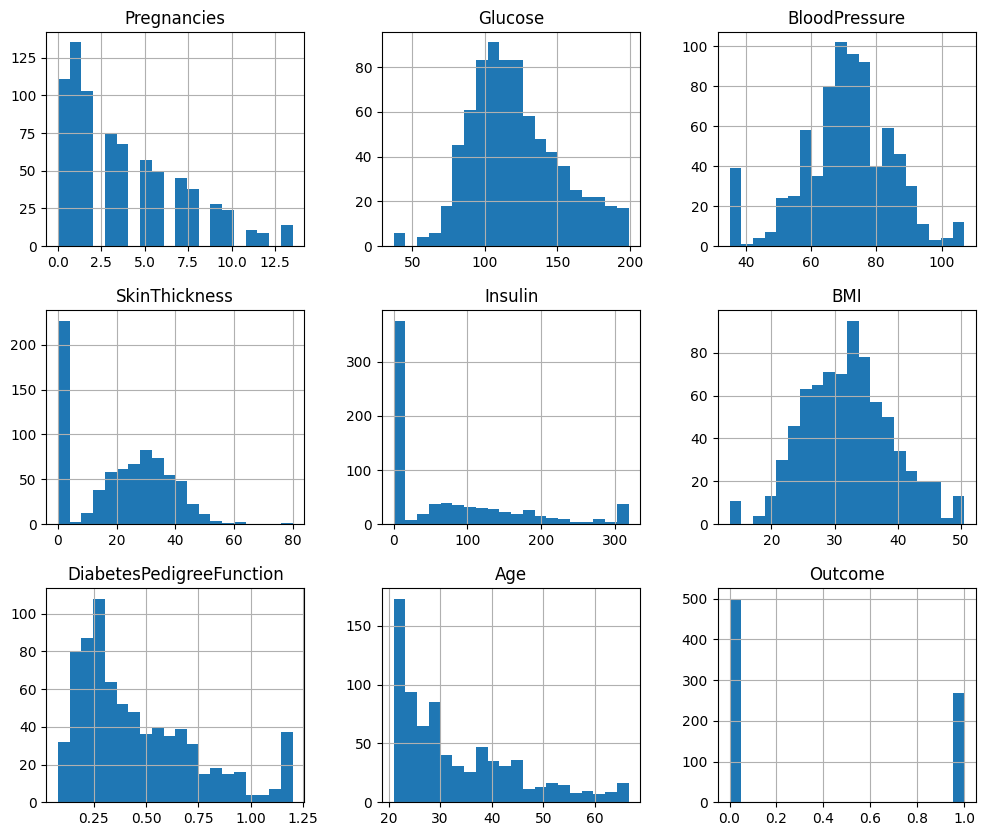

In [16]:
df.hist(bins=20, figsize=(12,10))
plt.show()

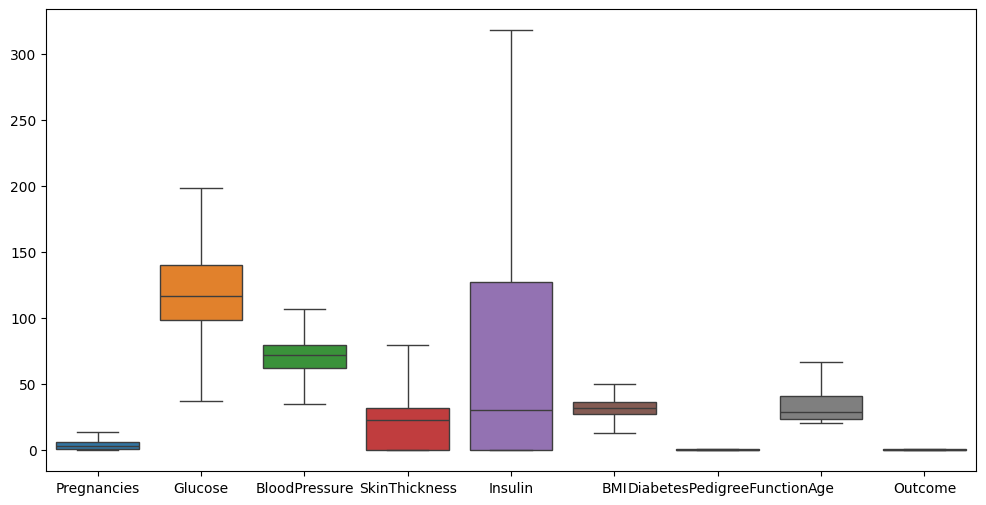

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()

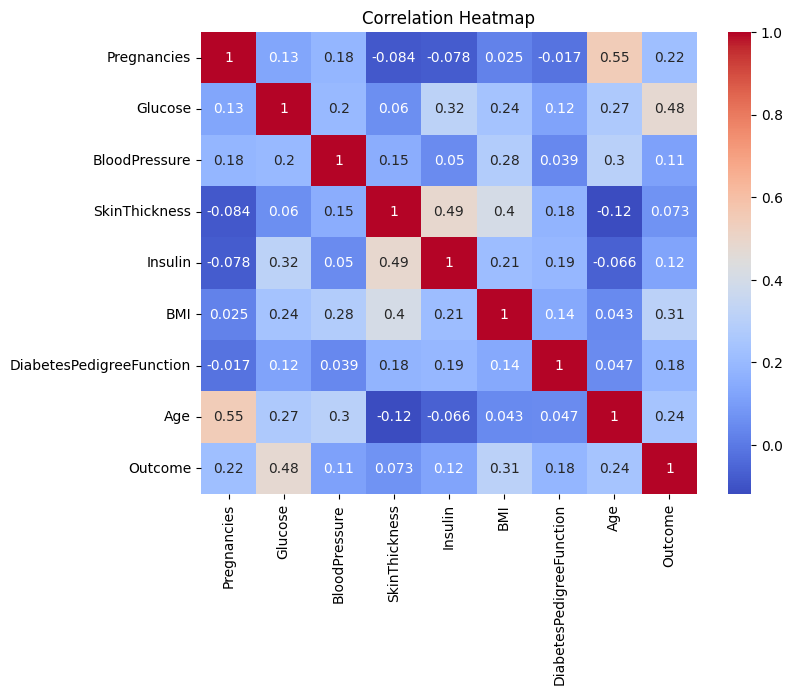

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

2. Data Preprocessing:                      

a. Handle missing values (e.g., imputation).


In [19]:

cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, pd.NA)

df.fillna(df.median(), inplace=True)
df

C:\Users\kanch\AppData\Local\Temp\ipykernel_25852\1444904499.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,27.0,125.0,36.8,0.340,27.0,0
765,5.0,121.0,72,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,29.0,125.0,30.1,0.349,47.0,1


In [20]:
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


b. Encode categorical variables.

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols.tolist())


Categorical Columns:
 []


In [22]:

if len(categorical_cols) > 0:
    df = pd.get_dummies(df, drop_first=True)
    print("\nAfter One-Hot Encoding, new columns are:\n", df.columns.tolist())
else:
    print("\nNo categorical columns found — encoding not required.")



No categorical columns found — encoding not required.


The dataset contains only numerical features.

Hence, no categorical encoding is necessary

3. Model Building:             

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)  


In [25]:
print("Data successfully split into training and testing sets.\n")
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape  (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape  (y_test):", y_test.shape)


train_percent = len(X_train) / len(df) * 100
test_percent = len(X_test) / len(df) * 100
print(f"\nData Split → {train_percent:.1f}% Training, {test_percent:.1f}% Testing")

Data successfully split into training and testing sets.

Training data shape (X_train): (614, 8)
Testing data shape  (X_test): (154, 8)
Training labels shape (y_train): (614,)
Testing labels shape  (y_test): (154,)

Data Split → 79.9% Training, 20.1% Testing


b. Train the model using the training data.

In [26]:
model.fit(X_train, y_train)

print("Model Coefficients:\n", model.coef_)
print("\nIntercept:", model.intercept_)


Model Coefficients:
 [[ 0.0616917   0.03375813 -0.01807831  0.00777359 -0.00112078  0.10565402
   0.82852022  0.0414744 ]]

Intercept: [-9.13844805]


4. Model Evaluation:          

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.                          
Visualize the ROC curve.


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [28]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7532467532467533
Precision: 0.6545454545454545
Recall: 0.6545454545454545
F1 Score: 0.6545454545454545
ROC-AUC: 0.8183654729109275


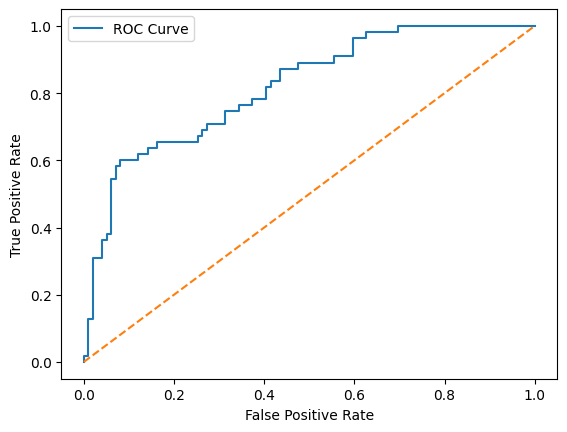

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

5. Interpretation:               

a. Interpret the coefficients of the logistic regression model.


In [30]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("Coefficients are :")
print(coefficients)

Coefficients are :
                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.828520
5                       BMI     0.105654
0               Pregnancies     0.061692
7                       Age     0.041474
1                   Glucose     0.033758
3             SkinThickness     0.007774
4                   Insulin    -0.001121
2             BloodPressure    -0.018078


In [31]:
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])
print("\n Interpretation (Odds Ratios)\n")
for idx, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    odds_ratio = row['Odds_Ratio']
    direction = "increase" if coef > 0 else "decrease"
    print(f"- {feature}: coefficient = {coef:.3f}, odds ratio = {odds_ratio:.3f} --> {direction} the likelihood of survival\n")



 Interpretation (Odds Ratios)

- DiabetesPedigreeFunction: coefficient = 0.829, odds ratio = 2.290 --> increase the likelihood of survival

- BMI: coefficient = 0.106, odds ratio = 1.111 --> increase the likelihood of survival

- Pregnancies: coefficient = 0.062, odds ratio = 1.064 --> increase the likelihood of survival

- Age: coefficient = 0.041, odds ratio = 1.042 --> increase the likelihood of survival

- Glucose: coefficient = 0.034, odds ratio = 1.034 --> increase the likelihood of survival

- SkinThickness: coefficient = 0.008, odds ratio = 1.008 --> increase the likelihood of survival

- Insulin: coefficient = -0.001, odds ratio = 0.999 --> decrease the likelihood of survival

- BloodPressure: coefficient = -0.018, odds ratio = 0.982 --> decrease the likelihood of survival



b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [32]:
coefficients['Impact'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Impact', ascending=False)
print("Feature Significance")
print("Features with strongest impact on survival probability:")
print(coefficients_sorted[['Feature', 'Coefficient', 'Odds_Ratio']])

Feature Significance
Features with strongest impact on survival probability:
                    Feature  Coefficient  Odds_Ratio
6  DiabetesPedigreeFunction     0.828520    2.289928
5                       BMI     0.105654    1.111437
0               Pregnancies     0.061692    1.063634
7                       Age     0.041474    1.042346
1                   Glucose     0.033758    1.034334
2             BloodPressure    -0.018078    0.982084
3             SkinThickness     0.007774    1.007804
4                   Insulin    -0.001121    0.998880


6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 


In [33]:
import pickle

In [34]:
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as logistic_model.pkl")

model = pickle.load(open("logistic_model.pkl", "rb"))


Model saved as logistic_model.pkl


# Interview Questions:           



## 1. What is the difference between precision and recall?
                                                                                  
--> Precision:It Measures how many of the predicted positives are actually correct.       
                
Formula: 
                                   
	​Precision = TP / TP+FP   
                                                                    
Precision mainly focuses on accuracy of positive predictions.              

--> Recall (Sensitivity):It Measures how many of the actual positives are correctly identified.                  
                 
Formula:  

    Recall = TP​ / TP+FN

Recall mainly focuses on catching all positive cases.

## 2. What is cross-validation, and why is it important in binary classification?
                                    
Cross-validation is a technique to split data into multiple parts (folds) and test the model on each part to check its performance.                                                                     

It is important because it helps to avoid overfitting, ensures the model generalizes well to unseen data, and gives a more reliable evaluation of performance in binary classification.